# Seattle Airbnb data 


- [Introduction](#intro)
- [A look at the data](#look)
- [Qusetion - 1](#Qusetion_1)
- [Qusetion - 2](#Qusetion_2)
- [Qusetion - 3](#Qusetion_3)
- [Summary](#Summary)


<a id='intro'></a>
## Introduction

we will be using [Seattle Airbnb data](https://www.kaggle.com/datasets/airbnb/seattle?resource=download) in this project to analyze it and find any useful insights we can come up with like : 
- Does the prices vary over the year ?
- what factors may affect the change in prices ?
- Can we predict prices to inform hosts and travellers?


<a id='look'></a>
## A look at the data

To get started, let's import our libraries.

In [1]:
import numpy as np 
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
cal = pd.read_csv('Downloads/Compressed/calendar.csv')#loading the we will be using
lis = pd.read_csv('Downloads/Compressed/listings.csv')

In [3]:
cal.head()# A look at the calender file

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
cal.shape# seems it has huge number of rows

(1393570, 4)

In [5]:
pd.set_option('display.max_columns', None)#this line to display all columns in the listings.csv
lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [61]:
lis.info()#looks like most columns have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
lis.shape# seems it has many features that we must filter out later

(3818, 92)

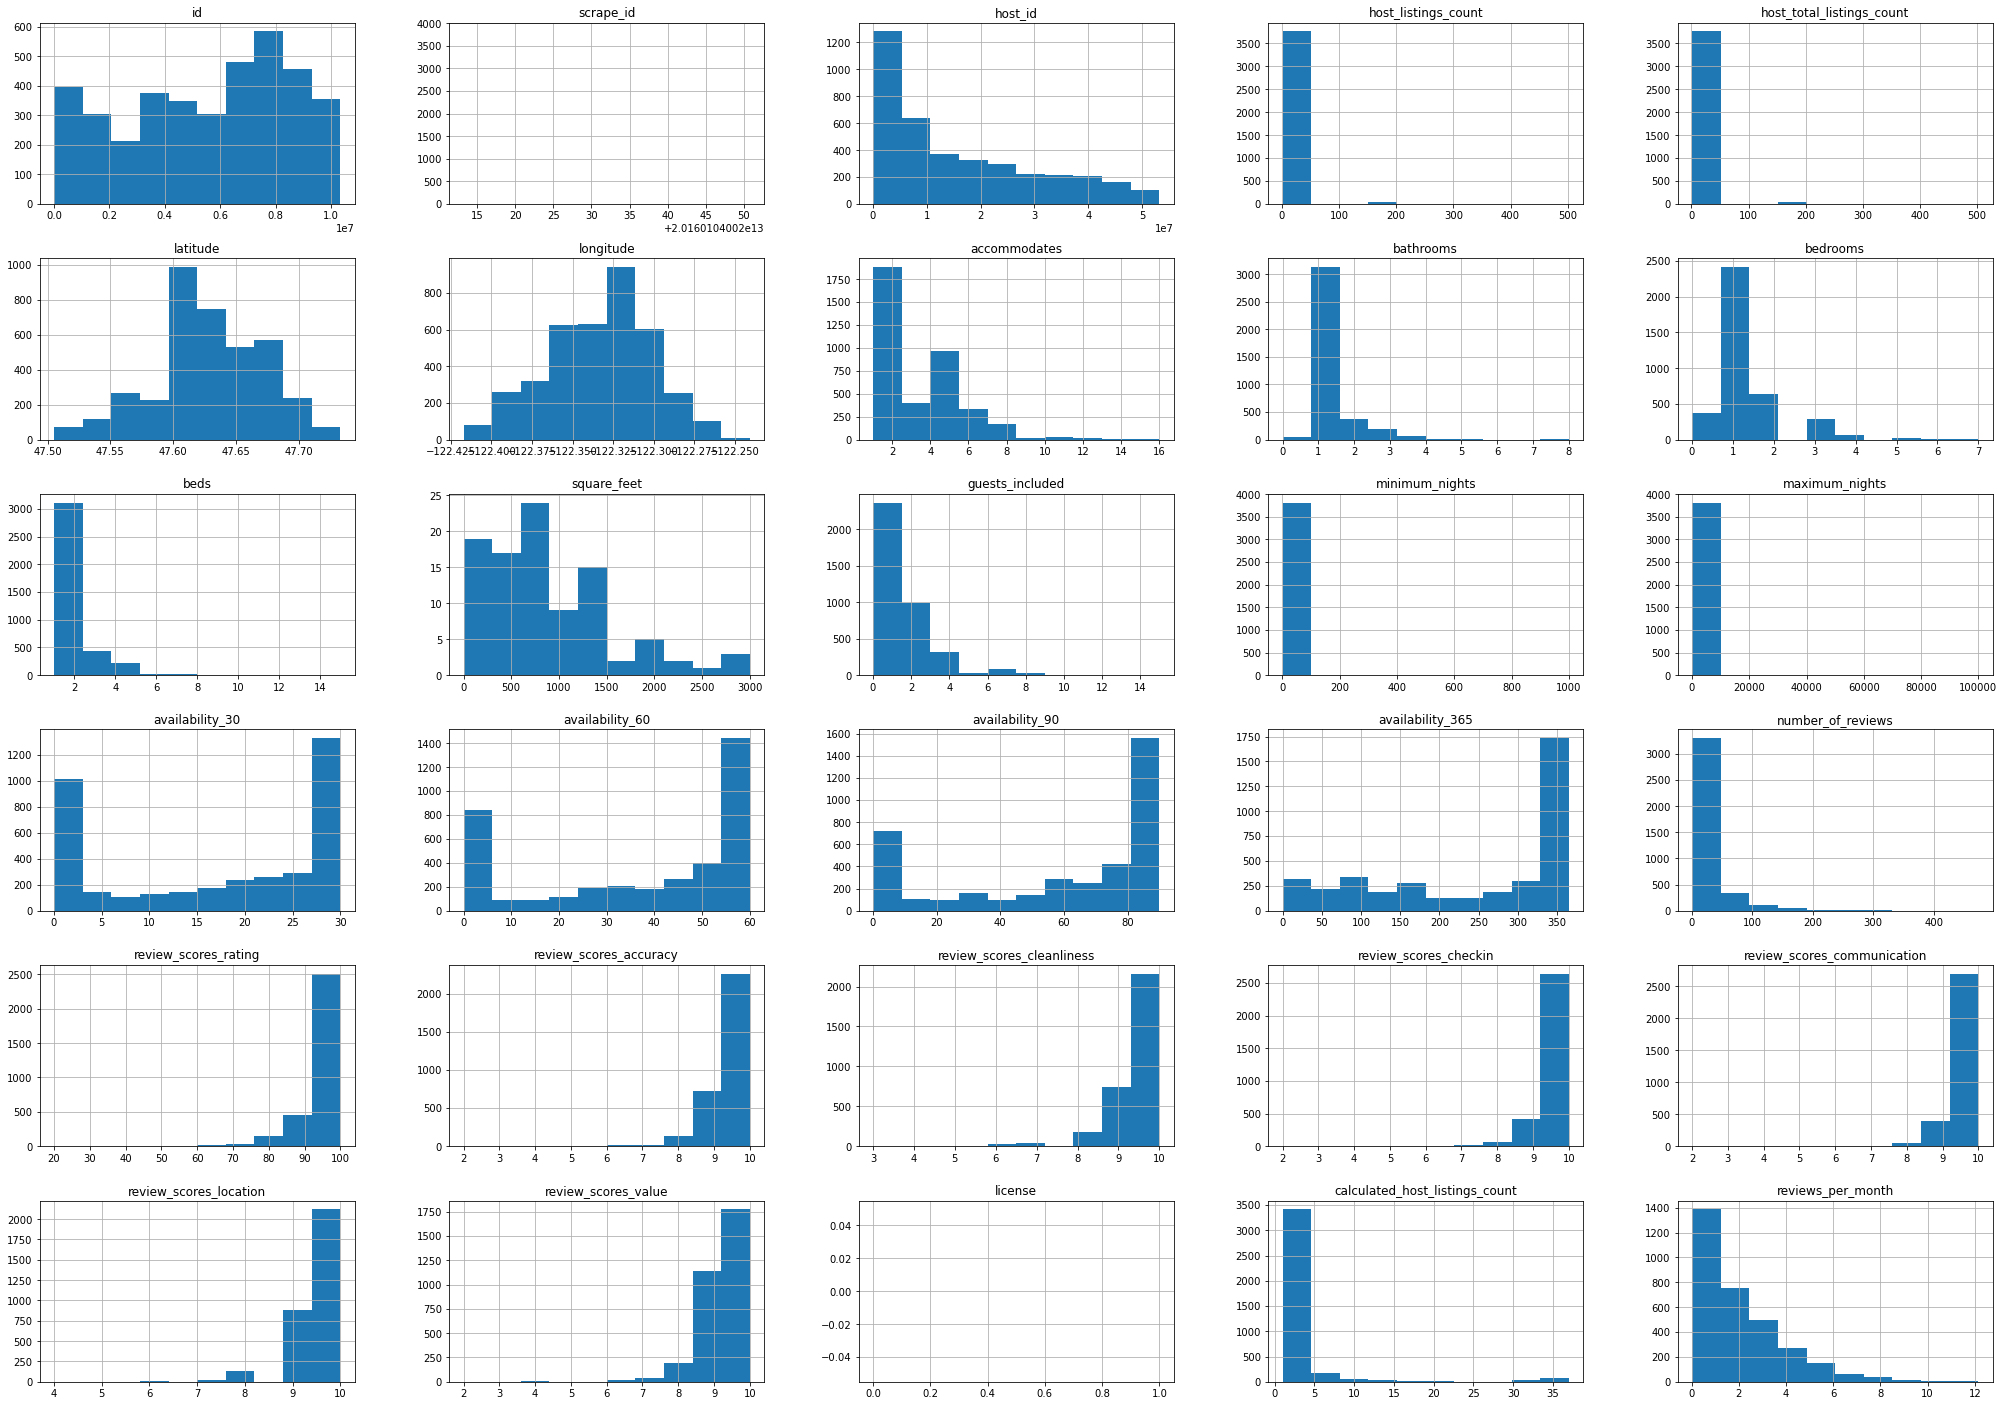

In [8]:
lis.hist(figsize =(35,25));

In [9]:
lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [10]:
cal.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [11]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

<a id='Qusetion_1'></a>
## Question - 1
Does the prices vary over the year ?

First lets take care first of the 'prices' and 'available' columns from the calender file

In [62]:
def float_price(x):
    if(type(x) is str):
        x = x.split('$')[1]
        x = x.replace(',','')
    return x

def clean_bool(x):
    if(x == 'f'):
        return 0
    else:
        return 1

In [130]:
# we will clean the columns first then change its type
cal['price']=cal['price'].apply(float_price)
cal['available'] = cal['available'].apply(clean_bool)
cal['available'] = cal['available'].astype('boolean')
cal['price'] = cal['price'].astype(float)
cal['price'].fillna(cal['price'].mean(),inplace = True)

In [20]:
cal['date'] = pd.to_datetime(cal['date'])#change the data type to datetime

cal['day_of_week'] = cal['date'].dt.day_name()#get the day of week

cal['month'] = cal['date'].dt.month_name()# get the month`s name

In [24]:
cal['month'] = cal['month'].astype('category')#then change the type to category

month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

cal['month'] = cal['month'].cat.set_categories(month_list,ordered=True)#order the months

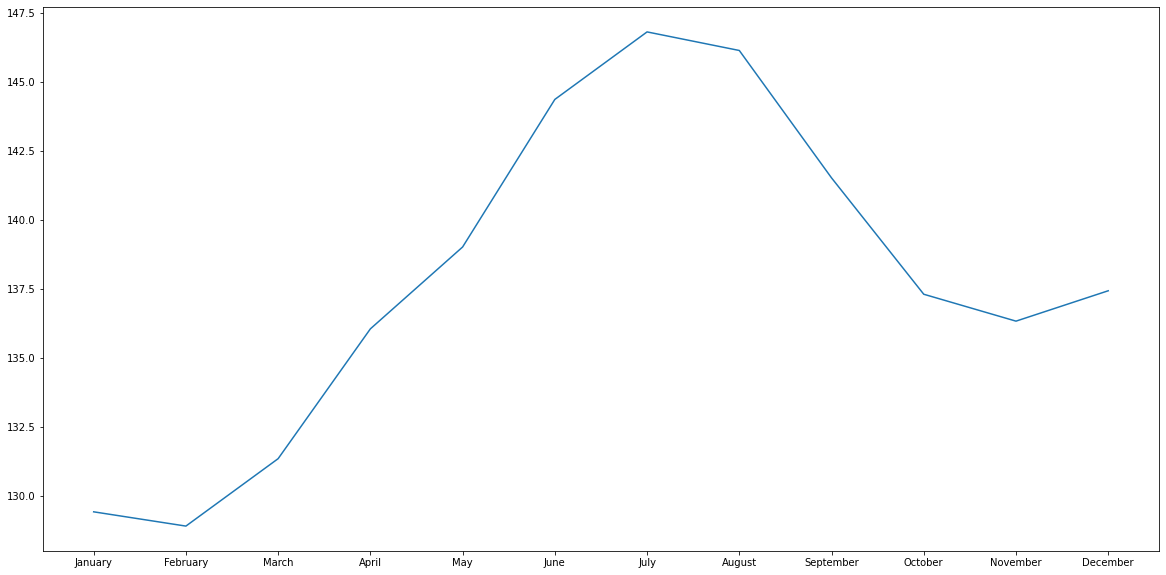

In [64]:
d = cal.groupby('month')['price'].mean()
d = d.reset_index()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(d['month'],d['price']);

lets see the effect of the availbility may have on the prices

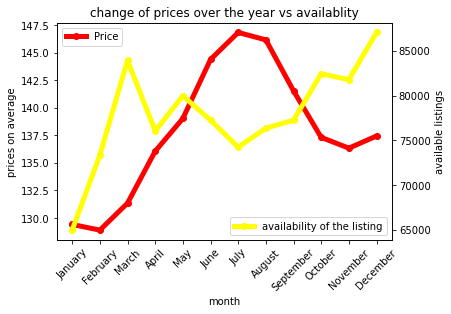

In [144]:
fig,ax1 = plt.subplots()
ax1.plot(cal.groupby('month')['price'].mean(),color='red', marker='o', linewidth=5, label='Price')
ax1.set_xlabel('month')
ax1.set_ylabel('prices on average')
ax1.set_xticks(cal['month'].unique())
ax1.set_xticklabels(cal['month'].unique(),rotation = 45)

ax2 = ax1.twinx()
ax2.plot(list(cal.groupby('month')['available'].sum()), color='yellow', marker ='o', linewidth=5, label='availability of the listing')
ax2.set_ylabel('available listings')
ax1.legend(loc=2)

ax2.legend(loc=4)
plt.title('change of prices over the year vs availablity')
plt.show()

**In the previous plot we notice that prices on average get at its peak in the summer and this Also when the availability drops**

In [ ]:
#Same what we did with the months
cal['day_of_week'] = cal['day_of_week'].astype('category')

days_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

cal['day_of_week'] = cal['day_of_week'].cat.set_categories(days_list,ordered=True)

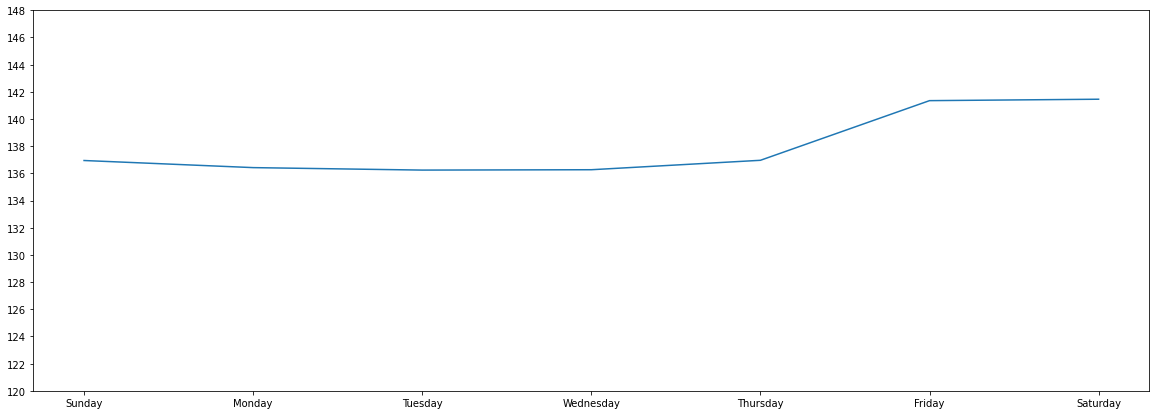

In [66]:
d = cal.groupby('day_of_week')['price'].mean()
d = d.reset_index()



f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.plot(d['day_of_week'],d['price']);
plt.yticks( range(120,150,2));

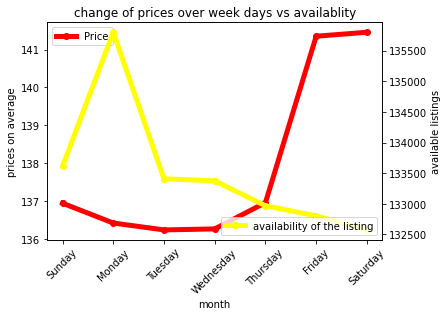

In [145]:
fig,ax1 = plt.subplots()
ax1.plot(cal.groupby('day_of_week')['price'].mean(),color='red', marker='o', linewidth=5, label='Price')
ax1.set_xlabel('month')
ax1.set_ylabel('prices on average')
ax1.set_xticks(cal['day_of_week'].unique())
ax1.set_xticklabels(cal['day_of_week'].unique(),rotation = 45)

ax2 = ax1.twinx()
ax2.plot(list(cal.groupby('day_of_week')['available'].sum()), color='yellow', marker ='o', linewidth=5, label='availability of the listing')
ax2.set_ylabel('available listings')
ax1.legend(loc=2)

ax2.legend(loc=4)
plt.title('change of prices over week days vs availablity')
plt.show()

**Here we notice that prices on average increase at the weekend Also when the availbility drops**

***From the previous plots we conclude that prices vary over the year and Also increase at the weekends***

<a id='Qusetion_2'></a>
## Question - 2
what factors may affect the change in prices ?

We will answer this question from the listings file

In [30]:
#let`s clean the prices column 
lis['price'] = lis['price'].apply(float_price)
lis['price'] = lis['price'].astype(float)

we will start with the categorical features and its effect on prices

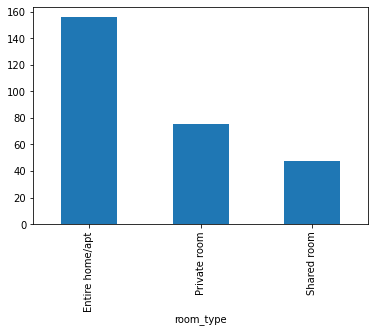

In [31]:
#This plot shows the average of the prices grouped by room type
(lis.groupby('room_type')['price'].mean()).plot(kind='bar');

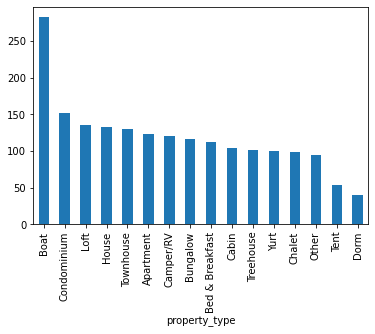

In [32]:
#This plot shows the average of the prices grouped by property type
(lis.groupby('property_type')['price'].mean().sort_values(ascending=False)).plot(kind='bar');

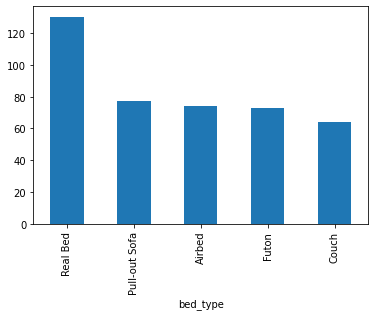

In [33]:
#This plot shows the average of the prices grouped by type of bed
(lis.groupby('bed_type')['price'].mean().sort_values(ascending=False)).plot(kind='bar');

**Depending on the previous plots the prices on average rise with the more comfortable services**

like : the real bed,Entire home and boat

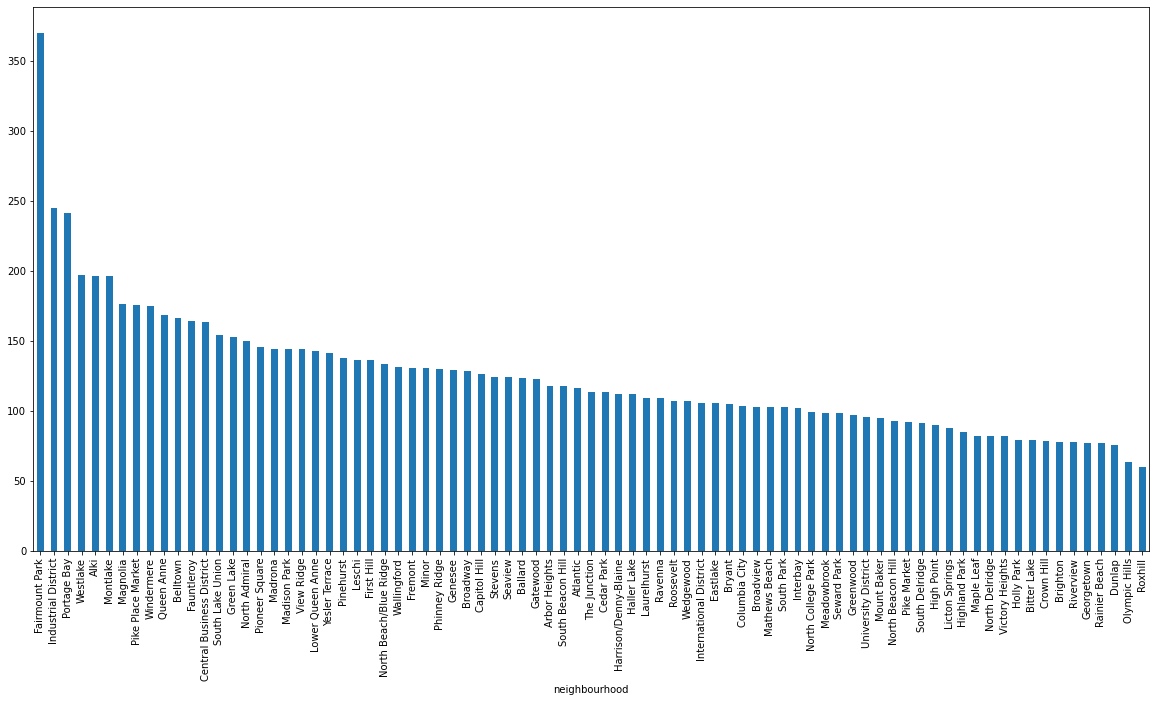

In [34]:
#This plot shows the average of the prices grouped by the neibourhood
(lis.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)).plot(kind='bar',figsize = (20,10));

Looks like the most expensive neibourhood on average is Fairmount park

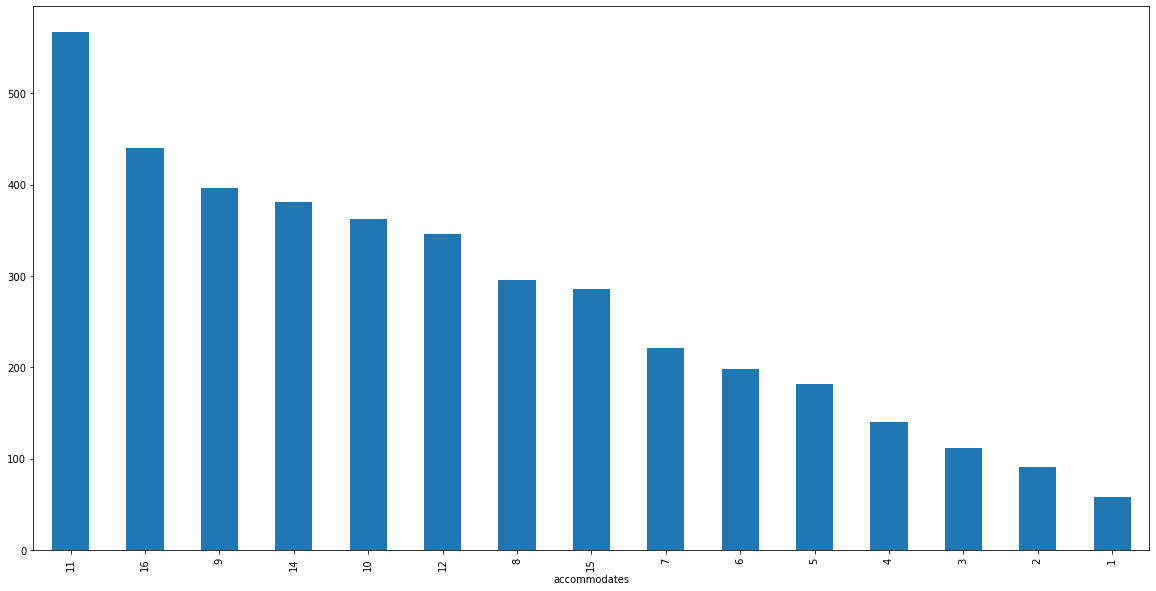

In [35]:
#This plot shows the average of the prices grouped by number of accommodates
(lis.groupby('accommodates')['price'].mean().sort_values(ascending=False)).plot(kind='bar',figsize = (20,10));

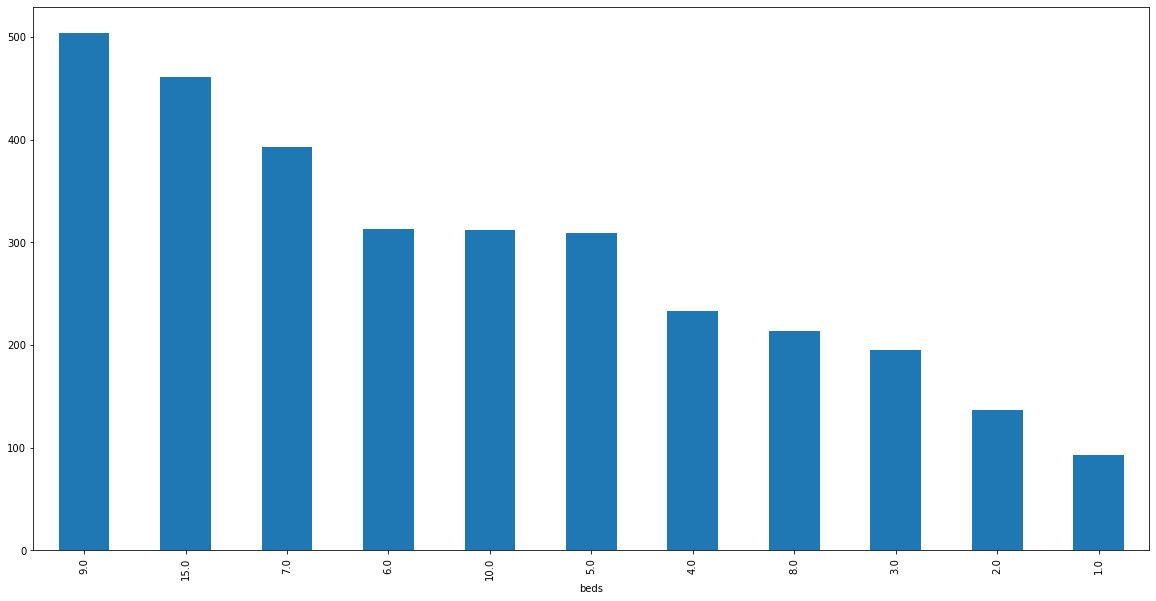

In [37]:
#This plot shows the average of the prices grouped by number of beds
(lis.groupby('beds')['price'].mean().sort_values(ascending=False)).plot(kind='bar',figsize = (20,10));

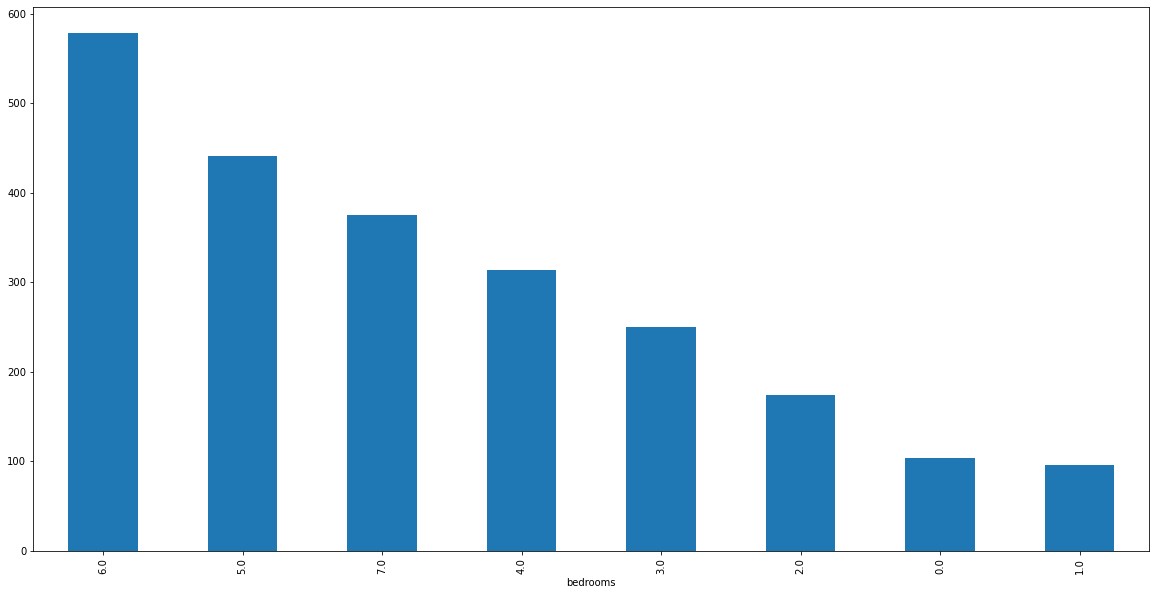

In [38]:
#This plot shows the average of the prices grouped by number of bedrooms
(lis.groupby('bedrooms')['price'].mean().sort_values(ascending=False)).plot(kind='bar',figsize = (20,10));

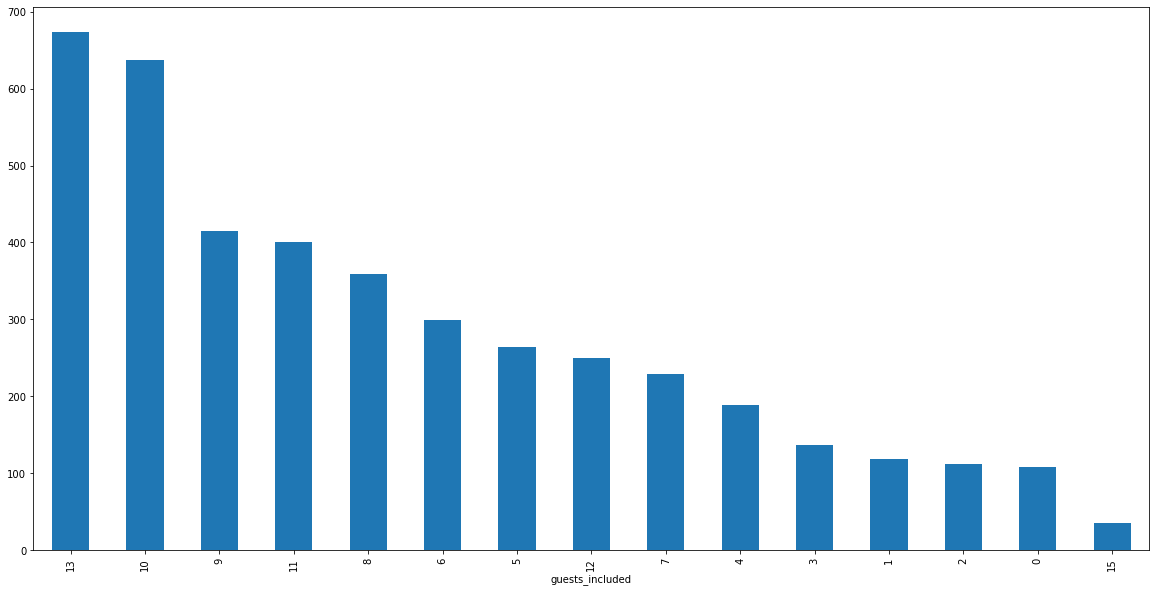

In [39]:
#This plot shows the average of the prices grouped by number of guests included
(lis.groupby('guests_included')['price'].mean().sort_values(ascending=False)).plot(kind='bar',figsize = (20,10));

Now we will see some of the continous numerical features

In [41]:
lis['cleaning_fee']=lis['cleaning_fee'].apply(float_price)
lis['cleaning_fee']=lis['cleaning_fee'].astype(float)

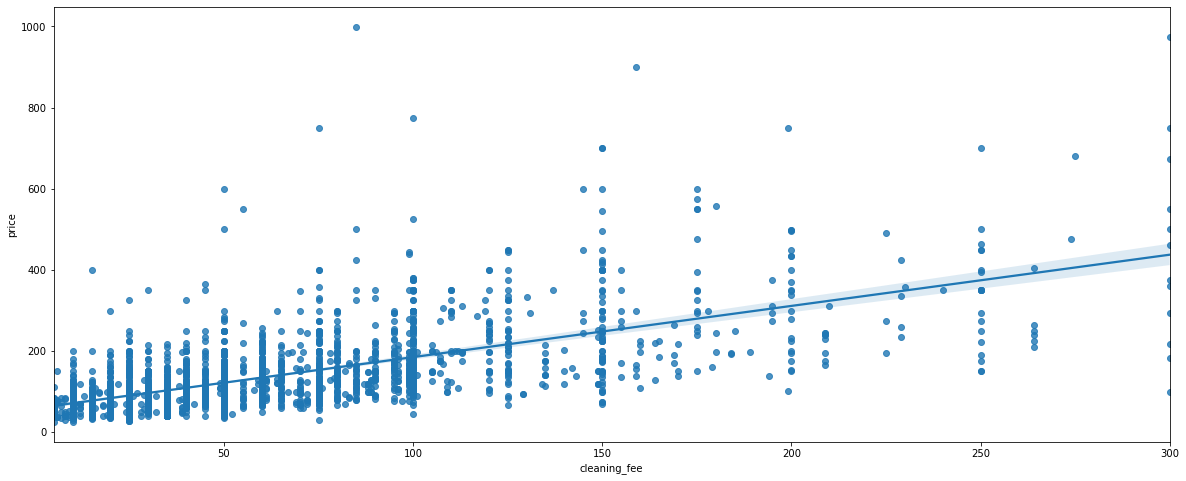

In [42]:
g = sns.regplot(data = lis,x='cleaning_fee',y='price');
g.figure.set_size_inches(20,8)

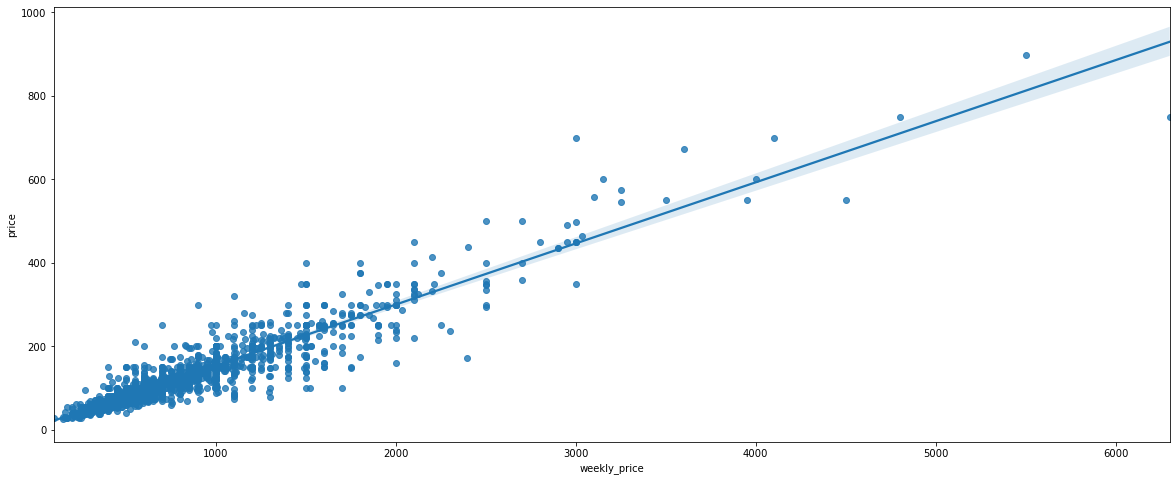

In [43]:
lis['weekly_price']=lis['weekly_price'].apply(float_price)
lis['weekly_price']=lis['weekly_price'].astype(float)
g = sns.regplot(data = lis,x='weekly_price',y='price');
g.figure.set_size_inches(20,8)

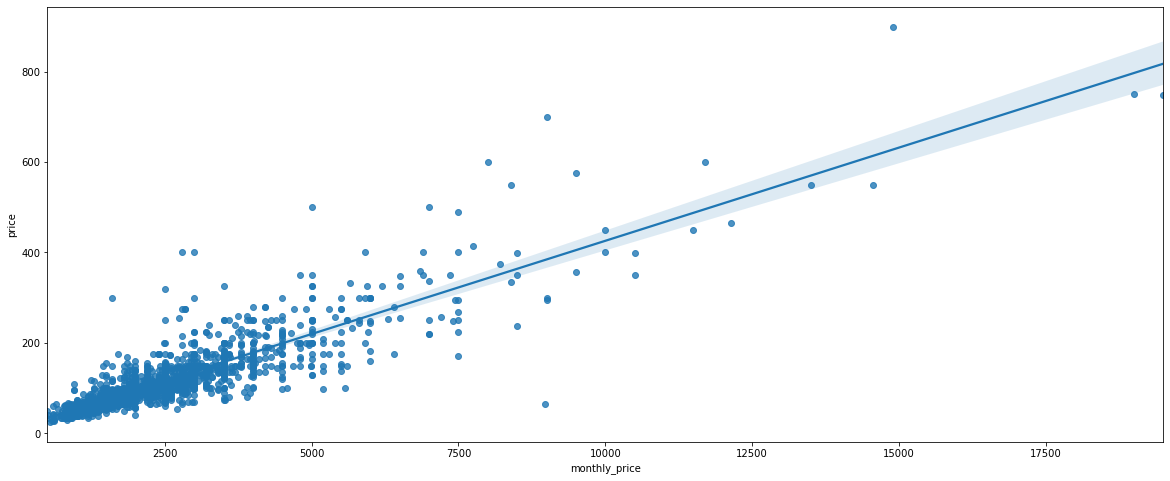

In [44]:
lis['monthly_price']=lis['monthly_price'].apply(float_price)
lis['monthly_price']=lis['monthly_price'].astype(float)
g = sns.regplot(data = lis,x='monthly_price',y='price');
g.figure.set_size_inches(20,8)

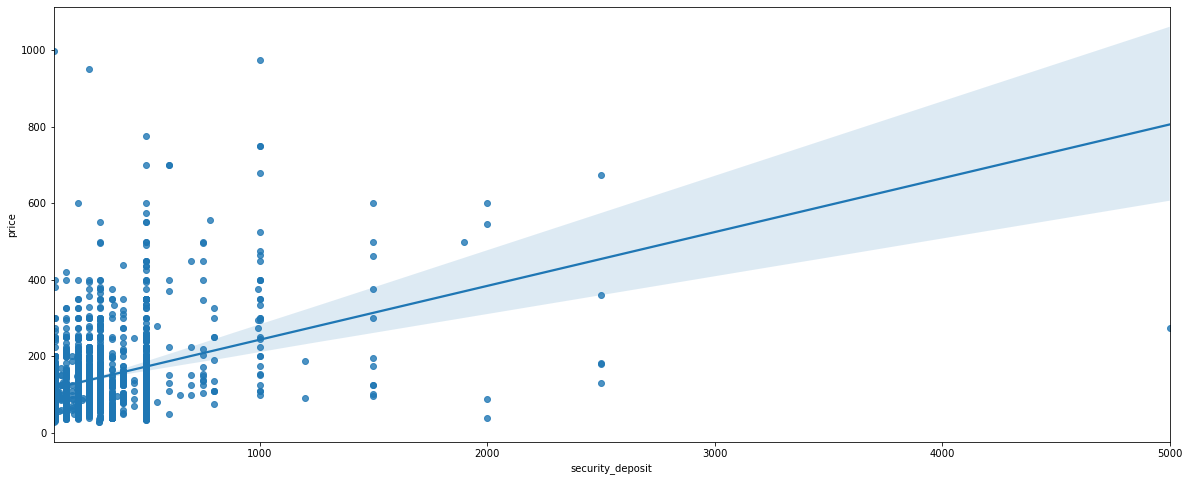

In [45]:
lis['security_deposit']=lis['security_deposit'].apply(float_price)
lis['security_deposit']=lis['security_deposit'].astype(float)
g = sns.regplot(data = lis,x='security_deposit',y='price');
g.figure.set_size_inches(20,8)

**Looks like that the cleaning fee and monthly price and weekly price are well correlated with the price and Also can be useful in building a regression model**

<a id='Qusetion_3'></a>
## Question - 3
Can we predict prices to inform the host and the traveller?

Now lets see what other features can we use to build our model

In [46]:
for i in ['require_guest_profile_picture','require_guest_phone_verification']:# A for loop to clean those columns
    lis[i] = lis[i].apply(clean_bool)
    lis[i] = lis[i].astype('bool')

***I have choosen the following features to build the regression model***

In [100]:
lis_1 = lis[['room_type','property_type','bed_type','cleaning_fee','guests_included','accommodates','cancellation_policy',
            'beds','bedrooms','bathrooms','city','monthly_price','weekly_price','security_deposit','price'
            ,'require_guest_profile_picture','require_guest_phone_verification','neighbourhood_group_cleansed']]

In [101]:
lis_1.isnull().sum()

room_type                              0
property_type                          1
bed_type                               0
cleaning_fee                        1030
guests_included                        0
accommodates                           0
cancellation_policy                    0
beds                                   1
bedrooms                               6
bathrooms                             16
city                                   0
monthly_price                       2301
weekly_price                        1809
security_deposit                    1952
price                                  0
require_guest_profile_picture          0
require_guest_phone_verification       0
neighbourhood_group_cleansed           0
dtype: int64

In [102]:
#converting those to 'object' to prevent imputing the mean with them
lis_1.beds = lis_1.beds.astype('object')
lis_1.bedrooms = lis_1.bedrooms.astype('object')
lis_1.bathrooms = lis_1.bathrooms.astype('object')

In [103]:
for i,j in zip(lis_1.columns,lis_1.dtypes):# A loop to handle missing values in our data
    if(lis_1[i].isnull().sum() != 0):
        if(j == 'object'):
            lis_1[i].fillna(lis_1[i].mode()[0],inplace = True)
        else:
            lis_1[i].fillna(lis_1[i].mean(),inplace = True)

In [104]:
#converting them back to 'int' to prevent them to be part of the 'one hot encoding'
lis_1.beds = lis_1.beds.astype('int')
lis_1.bedrooms = lis_1.bedrooms.astype('int')
lis_1.bathrooms = lis_1.bathrooms.astype('int')

In [52]:
lis_1.head()

,room_type,property_type,bed_type,cleaning_fee,guests_included,accommodates,cancellation_policy,beds,bedrooms,bathrooms,city,monthly_price,weekly_price,security_deposit,price,require_guest_profile_picture,require_guest_phone_verification,neighbourhood_group_cleansed
0,Entire home/apt,Apartment,Real Bed,61.710904,2,4,moderate,1,1,1,Seattle,2613.33619,788.481832,287.610397,85.0,False,False,Queen Anne
1,Entire home/apt,Apartment,Real Bed,40.000000,1,4,strict,1,1,1,Seattle,3000.00000,1000.000000,100.000000,150.0,True,True,Queen Anne
2,Entire home/apt,House,Real Bed,300.000000,10,11,strict,7,5,4,Seattle,2613.33619,788.481832,1000.000000,975.0,False,False,Queen Anne
3,Entire home/apt,Apartment,Real Bed,61.710904,1,3,flexible,2,0,1,Seattle,2300.00000,650.000000,287.610397,100.0,False,False,Queen Anne
4,Entire home/apt,House,Real Bed,125.000000,6,6,strict,3,3,2,Seattle,2613.33619,788.481832,700.000000,450.0,False,False,Queen Anne


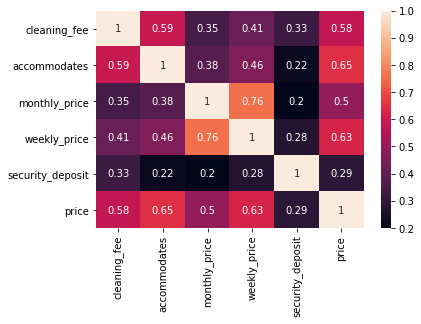

In [105]:
# A heatmap to show the correletion between the continous numerical features choosen
lis_2 = lis_1[['cleaning_fee','accommodates'
            ,'monthly_price','weekly_price','security_deposit','price']]
sns.heatmap(lis_2.corr(),annot=True);

In [106]:
lis_1 = pd.get_dummies(lis_1,drop_first=True)#performs 'one hot encoding'

In [107]:
#Splitting the data into X and y
X = lis_1.drop('price',axis = 1)
y = lis_1['price']

**We will use Ridge Regression , Randomforest regressor and KNN regressor for trying to predict the prices**

In [108]:
#let`s import the classes we will be using 
from sklearn.linear_model import Ridge as lr
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)#splitting the data
 
reg = lr(alpha = 20)
reg1 = rfr(random_state=0,n_estimators = 35,max_depth = 10)
reg2 = KNN(n_neighbors=10)
#fitting the models
reg.fit(X_train,y_train)
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)

y_test_pred = reg.predict(X_test)
y_test_pred1 = reg1.predict(X_test)
y_test_pred2 = reg2.predict(X_test)

In [109]:
#r2 score on the training and testing data using ridge regression
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6392811482912206
0.6650078089666001


In [110]:
#r2 score on the training and testing data using randomforest regressor
print(reg1.score(X_train,y_train))
print(reg1.score(X_test,y_test))

0.8390744389784249
0.7237128997724727


In [111]:
#r2 score on the training and testing data using KNN regressor
print(reg2.score(X_train,y_train))
print(reg2.score(X_test,y_test))

0.6420904524735163
0.6317873623773468


In [112]:
#prints the RMSE for the ridge,randomforest regressor and KNN regressor respectively
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred1)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred2)))

52.900218986438965
48.04192847536775
55.46122696384456


Looks like the least error of **48.042** and also the highest R2 score on test data of **0.724** was done by RandomForest regressor

Now lets see what was the most important features in this model through the **'feature_importances_'** attribute

In [114]:
data = {'feature_names':X_train.columns,'feature_importance':reg1.feature_importances_}
df_imp = pd.DataFrame(data)

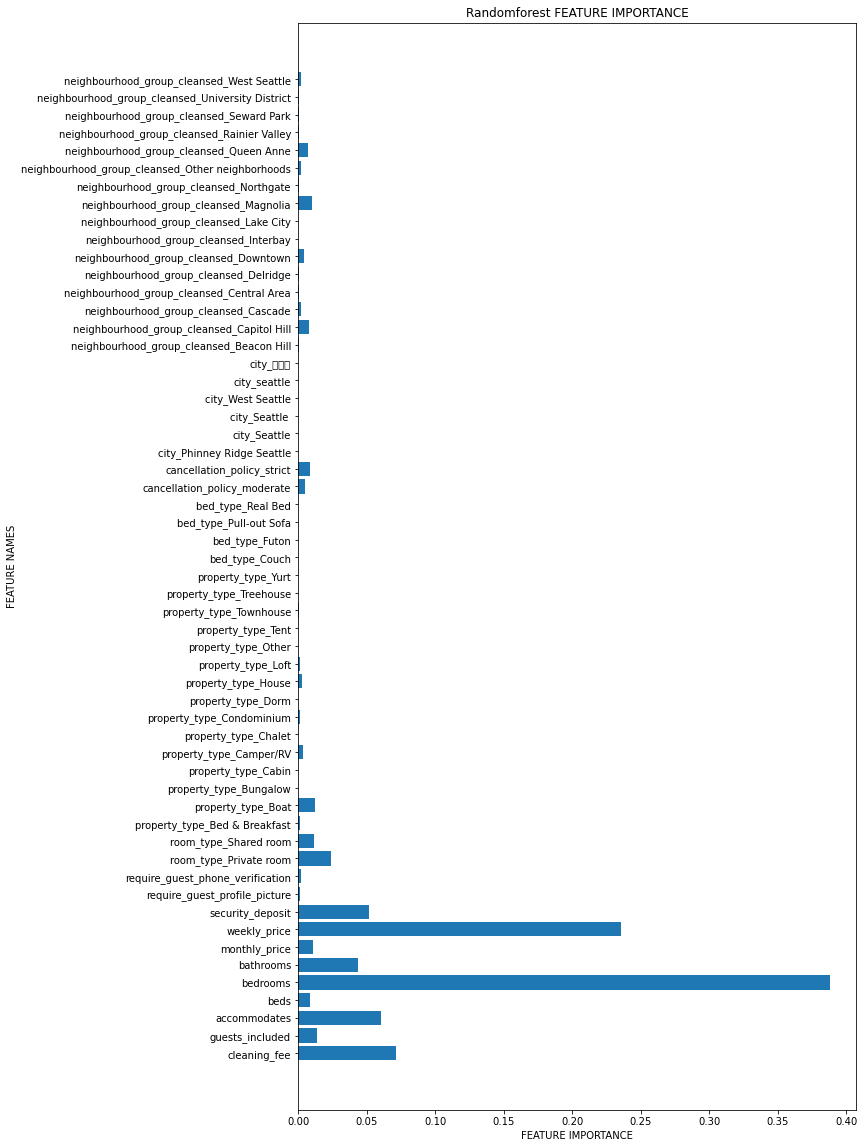

In [128]:
plt.figure(figsize=(10,20))
#Plot Searborn bar chart
plt.barh(df_imp['feature_names'],df_imp['feature_importance'])
#Add chart labels
plt.title('Randomforest FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

Looks like that model depended on the number of bedrooms,accommodates,cleaning fee and security deposit to make its predictions

<a id='Summary'></a>
## Summary
according to our best model in the least error and highest R2 score the most important features are number of bedrooms , weekly price , cleaning fee , number of accommodates and security deposit 